## DSC180B Group11 Project Report

 #### This notebook serves to demonstrate different visual plots for exploratory data analysis(EDA) and dataset validation

In [1]:
# Necessary imports

import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
from pprint import pprint
from collections import Counter

sys.path.insert(0, 'src')
from load_data import path_generator, load_jet_features, load_num_sv
from mass_distribution import mass_distribution
from sv_mass_distribution import sv_mass_distribution

%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

----

### Generate sample jet data 

For performing EDA, we will utilize just certain number of QCD and Signal jets for memory and runtime optimization. Source of these files are located either in `train_mass_qcd` for QCD jets or `train_mass_hbb` for Signal jets. Those directories are then separated into numbers of subdirectories. On average, the size of `.root` files for QCD data is far smaller than those for Signal data; this is possibly due to QCD data existing in smaller partitioned files than Signal data. According to our calculation, approximately $55$ `.root` files of QCD jets are as big as $8$ `.root` files of Signal jets in terms of file(byte) size. Hence by default, `path_generator()` generates $55$ random QCD `.root` files and $8$ random Signal `.root` files.

In [3]:
qcd_eda_sets = path_generator('qcd', eda=True)
signal_eda_sets = path_generator('signal', eda=True)

print(f'Loaded {len(qcd_eda_sets)} QCD files and \
{len(signal_eda_sets)} Signal files')

Loaded 55 QCD files and 8 Signal files


----

### EDA\#1 Jet mass distribution

Our regression model is capable of predicting the mass, or weight, of particle jets based on the information learned from features relevant to jet and other existing components in the jet. These jets can be largely categorized into two distinct groups: `QCD` and `Signal`. Some signal jets are known to be relatively heavier than QCD jets due to the type of resulting decay products and their expected lifespan, which allow longer-living particles to be heavier.

##### Part1 -- Validation

Before exploring, we need to ensure each jet belongs to one and only one jet type. 

In [4]:
df_qcd = load_jet_features(qcd_eda_sets)
display(df_qcd.head())
print('\n', f'{df_qcd.shape[0]} randomly generated QCD jet samples')

,fj_pt,fj_eta,fj_phi,fj_mass,fj_msoftdrop,fj_deepTagMD_H4qvsQCD,fj_deepTag_HvsQCD,fj_PN_H4qvsQCD,fj_PN_XbbvsQCD,fj_genjetmsd,...,fj_genW_decay,fj_genWstar_decay,fj_evt_met_covxx,fj_evt_met_covxy,fj_evt_met_covyy,fj_evt_met_dphi,fj_evt_met_pt,fj_evt_met_sig,fj_evt_pupmet_pt,fj_evt_pupmet_dphi
0,693.0,0.338989,2.245117,294.25000,288.750000,-1000.0,-1000.0,0.000104,0.000500,276.750000,...,-99.0,-99.0,2280.0,-1160.0,1976.0,3.141340,11.839965,0.045685,88.748947,-2.879272
1,580.5,0.577759,-0.712402,57.90625,1.132812,-1000.0,-1000.0,0.000007,0.148155,3.929688,...,-99.0,-99.0,2280.0,-1160.0,1976.0,-0.184326,11.839965,0.045685,88.748947,0.078247
2,814.0,-0.151520,1.676270,168.25000,3.964844,-1000.0,-1000.0,0.000004,0.000691,2.142578,...,-99.0,-99.0,694.0,-373.0,3840.0,3.109601,89.023026,2.060547,130.926910,3.063947
3,630.5,-1.002930,-1.359863,168.50000,89.312500,-1000.0,-1000.0,0.412682,0.052010,94.125000,...,-99.0,-99.0,694.0,-373.0,3840.0,-0.137451,89.023026,2.060547,130.926910,-0.183105
4,496.5,0.574341,0.123337,204.25000,185.875000,-1000.0,-1000.0,0.002959,0.000388,195.625000,...,-99.0,-99.0,3968.0,846.0,1064.0,0.626785,42.563751,0.810059,193.106094,3.123716



 413255 randomly generated QCD jet samples


In [5]:
df_signal = load_jet_features(signal_eda_sets)
display(df_signal.head())
print('\n', f'{df_signal.shape[0]} randomly generated Signal jet samples')

,fj_pt,fj_eta,fj_phi,fj_mass,fj_msoftdrop,fj_deepTagMD_H4qvsQCD,fj_deepTag_HvsQCD,fj_PN_H4qvsQCD,fj_PN_XbbvsQCD,fj_genjetmsd,...,fj_genW_decay,fj_genWstar_decay,fj_evt_met_covxx,fj_evt_met_covxy,fj_evt_met_covyy,fj_evt_met_dphi,fj_evt_met_pt,fj_evt_met_sig,fj_evt_pupmet_pt,fj_evt_pupmet_dphi
0,1636.0,0.197662,2.423828,202.000,194.250,-1000.0,-1000.0,1.800045e-05,0.999632,196.750,...,-99.0,-99.0,6400.0,-4880.0,5120.0,-3.122070,470.298218,20.828125,428.165741,-3.064941
1,1217.0,-0.239227,-0.688965,177.750,131.375,-1000.0,-1000.0,2.064137e-02,0.999949,138.750,...,-99.0,-99.0,6400.0,-4880.0,5120.0,-0.009277,470.298218,20.828125,428.165741,0.047852
2,1654.0,0.403809,-1.316895,261.500,187.375,-1000.0,-1000.0,6.319183e-01,0.989653,184.000,...,-99.0,-99.0,1932.0,-3472.0,17344.0,-2.975080,180.395706,2.898438,213.421570,2.962891
3,1338.0,0.187714,1.716553,236.625,151.500,-1000.0,-1000.0,2.078993e-02,0.963953,160.375,...,-99.0,-99.0,1932.0,-3472.0,17344.0,0.274658,180.395706,2.898438,213.421570,-0.070557
4,1657.0,0.221588,0.147614,233.875,168.375,-1000.0,-1000.0,3.669135e-07,0.999233,190.375,...,-99.0,-99.0,18496.0,2992.0,1092.0,2.890472,179.001770,5.367188,247.887268,2.939301



 508077 randomly generated Signal jet samples


In [6]:
# QCD
# For this checkup, we only need label attribute

IS_QCDb = 'fj_isQCDb'
IS_QCDothers = 'fj_isQCDothers'
all_attrs = df_qcd.columns.tolist()
start_idx = all_attrs.index(IS_QCDb)
end_idx = all_attrs.index(IS_QCDothers)+1

qcd_labels = all_attrs[start_idx:end_idx]

In [7]:
df_qcd_labels = df_qcd[qcd_labels]
display(df_qcd_labels.head())

,fj_isQCDb,fj_isQCDbb,fj_isQCDc,fj_isQCDcc,fj_isQCDlep,fj_isQCDothers
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,0,0,1,0,0
3,0,0,0,0,0,1
4,0,0,0,0,1,0


In [8]:
# We want each jet corresponding to exactly one type
# Having `True` in below print statement proves this

print(f'Each jet corresponds to exactly one type:\
 {len(df_qcd_labels.sum(axis=1).unique()) == 1}')

Each jet corresponds to exactly one type: True


In [9]:
# How many jets are there for different QCD types?

display(df_qcd_labels.sum(axis=0).sort_values(ascending=False)
        .to_frame(name='Count'))

,Count
fj_isQCDothers,251193
fj_isQCDlep,90150
fj_isQCDc,29113
fj_isQCDcc,28891
fj_isQCDb,7040
fj_isQCDbb,6868


In [10]:
# Signal jets
# For this checkup, we only need label attribute

IS_HBB = 'fj_H_bb'
IS_HQQ = 'fj_H_qq'
all_attrs = df_signal.columns.tolist()
start_idx = all_attrs.index(IS_HBB)
end_idx = all_attrs.index(IS_HQQ)+1

signal_labels = all_attrs[start_idx:end_idx]

In [11]:
df_signal_labels = df_signal[signal_labels]

# We're only going to include signal jets
# of types H_bb, H_cc, H_qq for performing EDA
# since these three types of Higgs jets 
# are the most common elementary particles
# Higgs bosons decay into
df_signal_labels = df_signal_labels[
    (df_signal_labels['fj_H_bb'] == 1) |
    (df_signal_labels['fj_H_cc'] == 1) |
    (df_signal_labels['fj_H_qq'] == 1)
]

# Drop observations that are associated to more than single type
df_signal_labels['temp'] = df_signal_labels['fj_H_bb'] + df_signal_labels['fj_H_cc'] + df_signal_labels['fj_H_qq']
print(f'Before filtering: {df_signal_labels.shape[0]} rows', '\n')

df_signal_labels = df_signal_labels[df_signal_labels['temp'] == 1].drop(columns='temp')
print(f'After filtering: {df_signal_labels.shape[0]} rows')

Before filtering: 482570 rows 

After filtering: 482521 rows


In [12]:
# We want each jet corresponding to exactly one type

print(f'Each jet corresponds to exactly one type:\
 {len(df_signal_labels.sum(axis=1).unique()) == 1}')

Each jet corresponds to exactly one type: True


In [13]:
# How many jets are there for different signal jet types?

display(df_signal_labels.sum(axis=0).sort_values(ascending=False).to_frame(name='Count'))

,Count
fj_H_bb,161271
fj_H_qq,160810
fj_H_cc,160440


-----

##### Part2 -- Distribution of the jet mass for each jet type

In [14]:
# Filtering using the validation results

signal_idx = df_signal_labels.index.tolist()
df_signal = df_signal.filter(items=signal_idx, axis=0)

In [15]:
# Create temporary `class` label to differentiate QCD jets from signal jets
# Then concatenate QCD dataset to signal dataset

df_qcd['Type'] = 'QCD'
df_signal['Type'] = 'Signal'

df_qcd_and_signal = pd.concat([df_qcd, df_signal], axis=0)
display(df_qcd_and_signal.head())

,fj_pt,fj_eta,fj_phi,fj_mass,fj_msoftdrop,fj_deepTagMD_H4qvsQCD,fj_deepTag_HvsQCD,fj_PN_H4qvsQCD,fj_PN_XbbvsQCD,fj_genjetmsd,...,fj_genWstar_decay,fj_evt_met_covxx,fj_evt_met_covxy,fj_evt_met_covyy,fj_evt_met_dphi,fj_evt_met_pt,fj_evt_met_sig,fj_evt_pupmet_pt,fj_evt_pupmet_dphi,Type
0,693.0,0.338989,2.245117,294.25000,288.750000,-1000.0,-1000.0,0.000104,0.000500,276.750000,...,-99.0,2280.0,-1160.0,1976.0,3.141340,11.839965,0.045685,88.748947,-2.879272,QCD
1,580.5,0.577759,-0.712402,57.90625,1.132812,-1000.0,-1000.0,0.000007,0.148155,3.929688,...,-99.0,2280.0,-1160.0,1976.0,-0.184326,11.839965,0.045685,88.748947,0.078247,QCD
2,814.0,-0.151520,1.676270,168.25000,3.964844,-1000.0,-1000.0,0.000004,0.000691,2.142578,...,-99.0,694.0,-373.0,3840.0,3.109601,89.023026,2.060547,130.926910,3.063947,QCD
3,630.5,-1.002930,-1.359863,168.50000,89.312500,-1000.0,-1000.0,0.412682,0.052010,94.125000,...,-99.0,694.0,-373.0,3840.0,-0.137451,89.023026,2.060547,130.926910,-0.183105,QCD
4,496.5,0.574341,0.123337,204.25000,185.875000,-1000.0,-1000.0,0.002959,0.000388,195.625000,...,-99.0,3968.0,846.0,1064.0,0.626785,42.563751,0.810059,193.106094,3.123716,QCD


,avg_jetmass,med_jetmass
Type,,
QCD,125.068893,57.03125
Signal,180.323227,109.75000


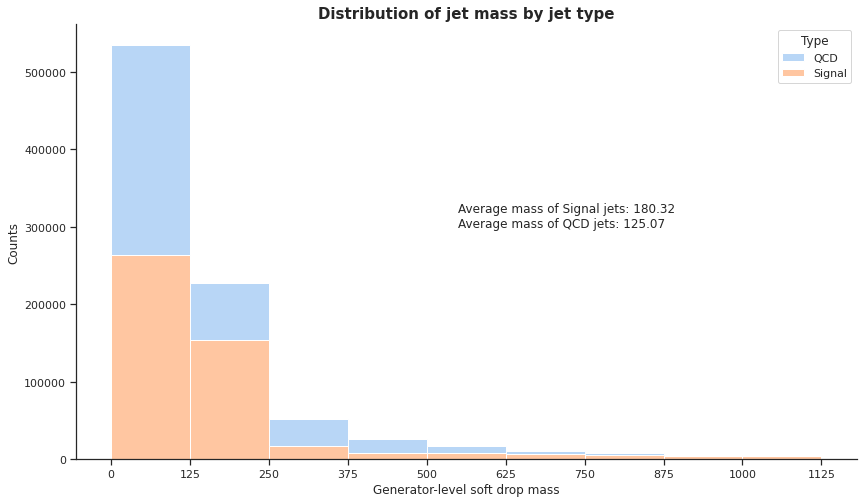

In [16]:
hist, summary = mass_distribution(df_qcd_and_signal)

display(summary)
print('\n')

------

### EDA\#2 Relationship between number of secondary verticies recorded in a jet and its mass

When two protons collide, the collision produces particles that soon decay into other sub-particles. However, not all particles, or sub-particles, decay at the same rate; typically, heavier particles have longer lifespan than lighter particles, which allows them to travel further away from the origin collision point(AKA *primary vertex*). At some point, those heavy particles decay into sub-particles as well, at which the decay point is recorded distant from origin collision point. This distant decay point is what scientists refer as *secondary vertex*. In other words, secondary vertices are usually recorded in a jet that contains some particles heavy enough to travel distant away from origin collision point. Based on this theory, we wanted to answer: Do the jets that have more secondary vertices recorded tend to be heavier than those that have fewer secondary vertices. We will check this potential relationship by plotting boxplot and linear-regression plot(`lmplot`)

#### QCD jets

In [17]:
# Load attributes relevant to secondary vertices in QCD jets data

qcd_num_svs, qcd_jet_mass = load_num_sv(qcd_eda_sets)

In [18]:
# Calculate necessary statistics

avg_qcd_num_svs = np.mean(qcd_num_svs)
avg_qcd_jet_mass = np.mean(qcd_jet_mass)

med_qcd_num_svs = np.median(qcd_num_svs)
med_qcd_jet_mass = np.median(qcd_jet_mass)

# We will check the most common count of 
# secondary vertices recorded in QCD jets
qcd_num_svs_counter = Counter(qcd_num_svs)
temp = qcd_num_svs_counter.items()
qcd_num_svs_counts = sorted(temp, reverse=True, key=lambda x:x[1])

In [19]:
df_qcd_num_svs_counts = pd.DataFrame(qcd_num_svs_counts,
                                     columns=['# of SVs in a jet', 'counts'],
                                    ).set_index('# of SVs in a jet')

display(df_qcd_num_svs_counts)
print(f'Majority of QCD jets in our data has zero to only few secondary vertex\
 recorded', '\n')

,counts
# of SVs in a jet,
0,150467
1,133811
2,72939
3,33178
4,13685
5,5532
6,2224
7,1419


Majority of QCD jets in our data has zero to only few secondary vertex recorded 



In [20]:
# Construct dataframe with available information

qcd_dict = {
    '# of SVs recorded':qcd_num_svs,
    'generator-level soft drop mass':qcd_jet_mass
}

qcd_df = pd.DataFrame(qcd_dict)
display(qcd_df.head())

,# of SVs recorded,generator-level soft drop mass
0,0,276.750000
1,0,3.929688
2,1,2.142578
3,0,94.125000
4,2,195.625000


,Avg_jetmass,Median_jetmass
# of SVs recorded,,
0,87.654115,25.1875
1,118.797072,56.1875
2,153.897836,89.4375
3,185.427215,118.8125
4,214.935310,148.3750
5,235.407554,164.1250
6,260.517423,178.0000
7,281.623743,193.5000


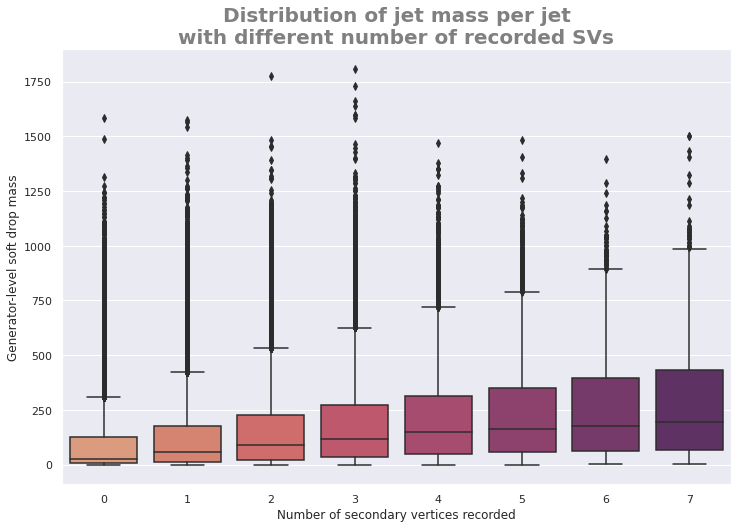

In [21]:
# Visualize distribution of jet mass
# per QCD jets with different number of SVs in them
# using boxplot

box, summary = sv_mass_distribution(qcd_df)

display(summary)
print('\n')

#### Signal jets

In [22]:
# Load attributes relevant to secondary vertices in Signal jets data

signal_num_svs, signal_jet_mass = load_num_sv(signal_eda_sets)

In [23]:
# Calculate necessary statistics

avg_signal_num_svs = np.mean(signal_num_svs)
avg_signal_jet_mass = np.mean(signal_jet_mass)

med_signal_num_svs = np.median(signal_num_svs)
med_signal_jet_mass = np.median(signal_jet_mass)

# We will check the most common count of 
# secondary vertices recorded in Signal jets
signal_num_svs_counter = Counter(signal_num_svs)
temp = signal_num_svs_counter.items()
signal_num_svs_counts = sorted(temp, reverse=True, key=lambda x:x[1])

In [24]:
df_signal_num_svs_counts = pd.DataFrame(signal_num_svs_counts,
                                       columns=['# of SVs in a jet', 'counts']
                                       ).set_index('# of SVs in a jet')

display(df_signal_num_svs_counts)
print(f'Unlike QCD, majority of Signal jets in our data has at least 1 secondary vertices\
 recorded')

,counts
# of SVs in a jet,
1,140840
2,115336
0,100652
3,73813
4,40194
5,20029
6,9558
7,7655


Unlike QCD, majority of Signal jets in our data has at least 1 secondary vertices recorded


In [25]:
signal_dict = {
    '# of SVs recorded':signal_num_svs,
    'generator-level soft drop mass':signal_jet_mass
}

signal_df = pd.DataFrame(signal_dict)
display(signal_df.head())

,# of SVs recorded,generator-level soft drop mass
0,1,196.750
1,2,138.750
2,7,184.000
3,2,160.375
4,0,190.375


,Avg_jetmass,Median_jetmass
# of SVs recorded,,
0,133.053303,78.6250
1,153.179244,90.4375
2,180.780212,110.2500
3,208.764787,128.7500
4,234.712512,141.0000
5,259.269747,150.6250
6,286.905370,161.3750
7,318.261098,162.6250


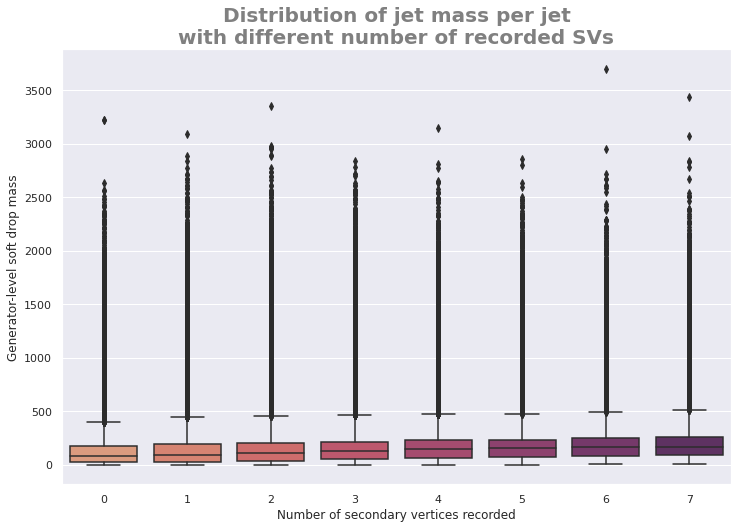

In [26]:
# Construct dataframe with available information

signal_box, summary = sv_mass_distribution(signal_df)

display(summary)
print('\n')

> As the presence of secondary vertices in a jet often indicates presence of heavy particles with longer lifespan, we expected number of secondary vertices recorded in a jet to have positive relationship with the jet mass. For instance, the two b-quarks produced from the decay of Higgs boson have relatively longer lifespan due to its heavier weight, which allow them to travel far enough from primary vertex and form secondary vertex. From above boxplots, we can see clear positive trend in jet mass for QCD jets as more secondary vertices are recorded in them. Surprisingly, signal jets failed to show as strong positive trend in jet mass with respect to increasing number of recorded secondary vertices. We strongly assume this has to do with presence of noise data in our dataset. But overall, there exist positive relationship between number of secondary vertices recorded in a jet and the mass of that jet.